In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [46]:
url = 'https://raw.githubusercontent.com/AcidTwinsn/challenge_telecom_Parte2/refs/heads/main/TelecomX_Limpio.csv'

df = pd.read_csv(url)
df.head()


,IDCliente,Cancelacion,Genero,Jubilado,Pareja,Dependientes,Antiguedad,ServicioTelefono,MultiplesLineas,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,SuscripcionTV,SuscripcionPelis,Contrato,FacturaOnline,MetodoPago,CargoMensual,CargoTotal,Cuentas_Diarias
0,0002-ORFBO,0,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un Año,Sí,Cheque Por Correo,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mes a Mes,No,Cheque Por Correo,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,No,No,4,Sí,No,Fibra Óptica,...,Sí,No,No,No,Mes a Mes,Sí,Cheque Electrónico,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,Sí,No,13,Sí,No,Fibra Óptica,...,Sí,No,Sí,Sí,Mes a Mes,Sí,Cheque Electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,Sí,No,3,Sí,No,Fibra Óptica,...,No,Sí,Sí,No,Mes a Mes,Sí,Cheque Por Correo,83.9,267.40,2.796667


In [47]:
print(df.isna().sum())

IDCliente                0
Cancelacion              0
Genero                   0
Jubilado                 0
Pareja                   0
Dependientes             0
Antiguedad               0
ServicioTelefono         0
MultiplesLineas          0
ServicioInternet         0
SeguridadOnline          0
RespaldoOnline           0
ProteccionDispositivo    0
SoporteTecnico           0
SuscripcionTV            0
SuscripcionPelis         0
Contrato                 0
FacturaOnline            0
MetodoPago               0
CargoMensual             0
CargoTotal               0
Cuentas_Diarias          0
dtype: int64


In [48]:
print(df.columns)

Index(['IDCliente', 'Cancelacion', 'Genero', 'Jubilado', 'Pareja',
       'Dependientes', 'Antiguedad', 'ServicioTelefono', 'MultiplesLineas',
       'ServicioInternet', 'SeguridadOnline', 'RespaldoOnline',
       'ProteccionDispositivo', 'SoporteTecnico', 'SuscripcionTV',
       'SuscripcionPelis', 'Contrato', 'FacturaOnline', 'MetodoPago',
       'CargoMensual', 'CargoTotal', 'Cuentas_Diarias'],
      dtype='object')


In [49]:
df.shape[0]

7267

In [50]:
print(df.duplicated().sum())
print(df.info())
print(df.describe())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IDCliente              7267 non-null   object 
 1   Cancelacion            7267 non-null   int64  
 2   Genero                 7267 non-null   object 
 3   Jubilado               7267 non-null   int64  
 4   Pareja                 7267 non-null   object 
 5   Dependientes           7267 non-null   object 
 6   Antiguedad             7267 non-null   int64  
 7   ServicioTelefono       7267 non-null   object 
 8   MultiplesLineas        7267 non-null   object 
 9   ServicioInternet       7267 non-null   object 
 10  SeguridadOnline        7267 non-null   object 
 11  RespaldoOnline         7267 non-null   object 
 12  ProteccionDispositivo  7267 non-null   object 
 13  SoporteTecnico         7267 non-null   object 
 14  SuscripcionTV          7267 non-null   object 
 15  Su

In [51]:
print("Distribución de Cancelación:")
print(df['Cancelacion'].value_counts())
print(f"\nPorcentajes:")
cancelacion_pct = df['Cancelacion'].value_counts(normalize=True) * 100
print(cancelacion_pct)

Distribución de Cancelación:
Cancelacion
0    5398
1    1869
Name: count, dtype: int64

Porcentajes:
Cancelacion
0    74.280996
1    25.719004
Name: proportion, dtype: float64


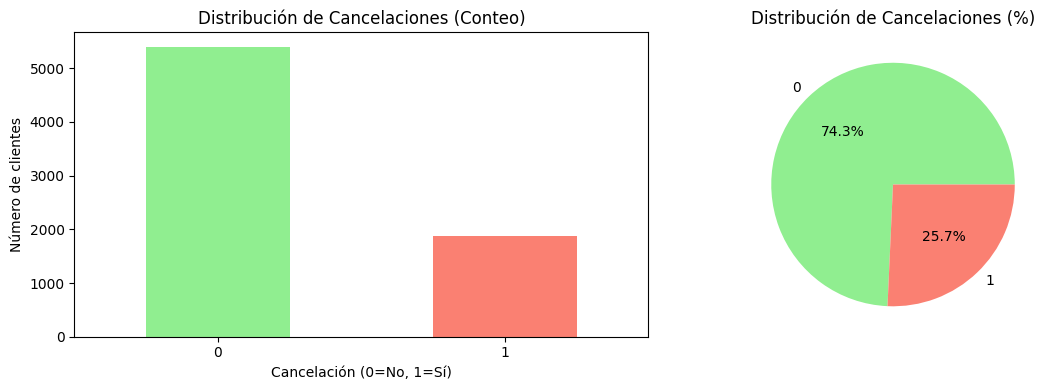

In [52]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Cancelacion'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Distribución de Cancelaciones (Conteo)')
plt.xlabel('Cancelación (0=No, 1=Sí)')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
cancelacion_pct.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Distribución de Cancelaciones (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [53]:
# Separar X y y
X = df.drop(["IDCliente", "Cancelacion"], axis=1)
y = df["Cancelacion"]

# Dividir en train/test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [54]:
print(f"Tamaño total del dataset: {len(df)}")
print(f"Tamaño de entrenamiento: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Tamaño de prueba: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\nDistribución en conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True) * 100)

print(f"\nDistribución en conjunto de prueba:")
print(y_test.value_counts(normalize=True) * 100)

Tamaño total del dataset: 7267
Tamaño de entrenamiento: 5086 (70.0%)
Tamaño de prueba: 2181 (30.0%)

Distribución en conjunto de entrenamiento:
Cancelacion
0    74.282344
1    25.717656
Name: proportion, dtype: float64

Distribución en conjunto de prueba:
Cancelacion
0    74.277854
1    25.722146
Name: proportion, dtype: float64


In [55]:
cat_cols = ["Genero", "Jubilado", "Pareja", "Dependientes",
            "ServicioTelefono", "MultiplesLineas", "ServicioInternet",
            "SeguridadOnline", "RespaldoOnline", "ProteccionDispositivo",
            "SoporteTecnico", "SuscripcionTV", "SuscripcionPelis",
            "Contrato", "FacturaOnline", "MetodoPago"]

num_cols = ["Antiguedad", "CargoMensual", "CargoTotal", "Cuentas_Diarias"]

Matriz de correlación - Variables numéricas:
                 Antiguedad  CargoMensual  CargoTotal  Cuentas_Diarias  \
Antiguedad         1.000000      0.247982    0.825407         0.247982   
CargoMensual       0.247982      1.000000    0.652211         1.000000   
CargoTotal         0.825407      0.652211    1.000000         0.652211   
Cuentas_Diarias    0.247982      1.000000    0.652211         1.000000   
Cancelacion       -0.344079      0.189866   -0.193345         0.189866   

                 Cancelacion  
Antiguedad         -0.344079  
CargoMensual        0.189866  
CargoTotal         -0.193345  
Cuentas_Diarias     0.189866  
Cancelacion         1.000000  


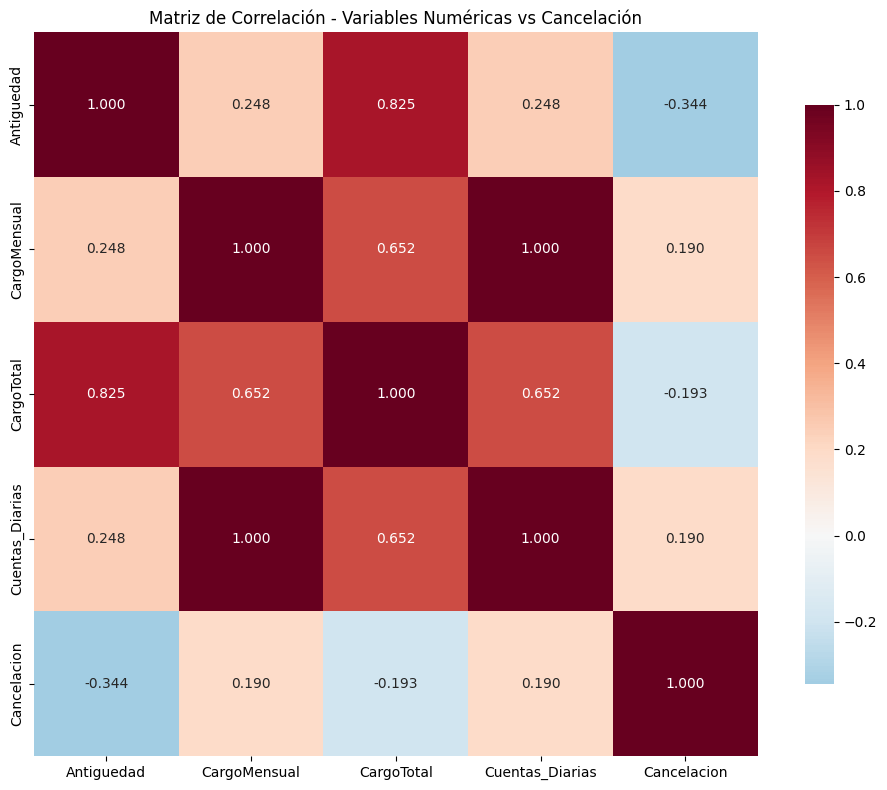

In [56]:
print("Matriz de correlación - Variables numéricas:")
num_cols_with_target = num_cols + ["Cancelacion"]
df_num = df[num_cols_with_target]
corr_matrix = df_num.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", center=0, fmt=".3f",
            square=True, cbar_kws={"shrink": 0.8})
plt.title("Matriz de Correlación - Variables Numéricas vs Cancelación")
plt.tight_layout()
plt.show()

In [57]:
importantes_cat = ["Contrato", "MetodoPago", "ServicioInternet", "Pareja"]


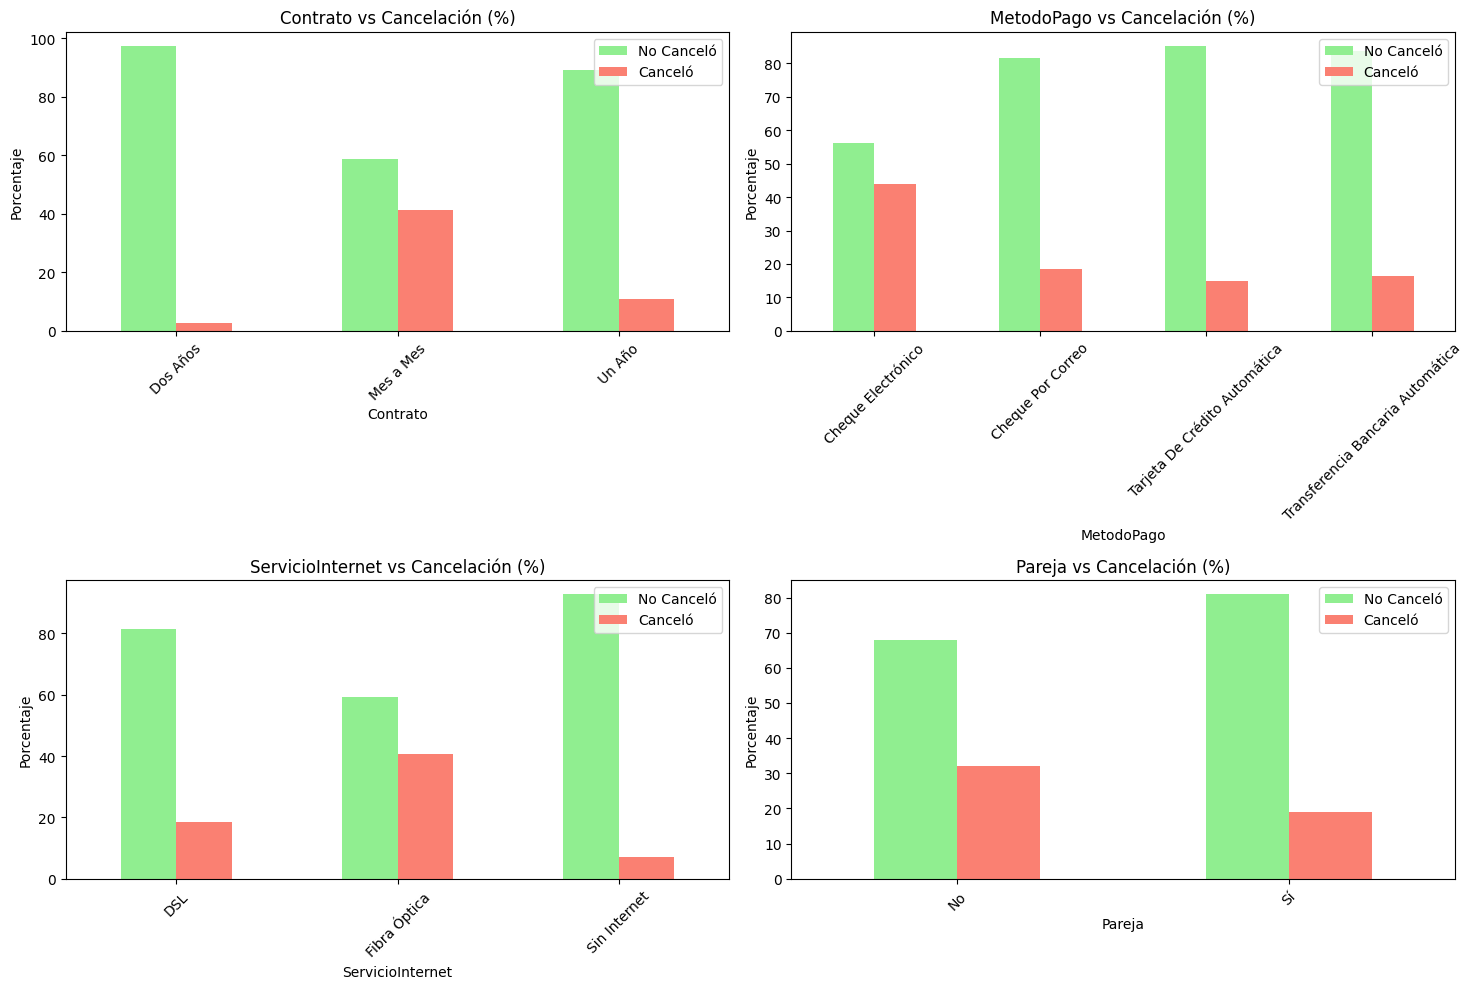

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(importantes_cat):
    ct = pd.crosstab(df[col], df['Cancelacion'], normalize='index') * 100

    ct.plot(kind='bar', ax=axes[i], color=['lightgreen', 'salmon'])
    axes[i].set_title(f'{col} vs Cancelación (%)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Porcentaje')
    axes[i].legend(['No Canceló', 'Canceló'], loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

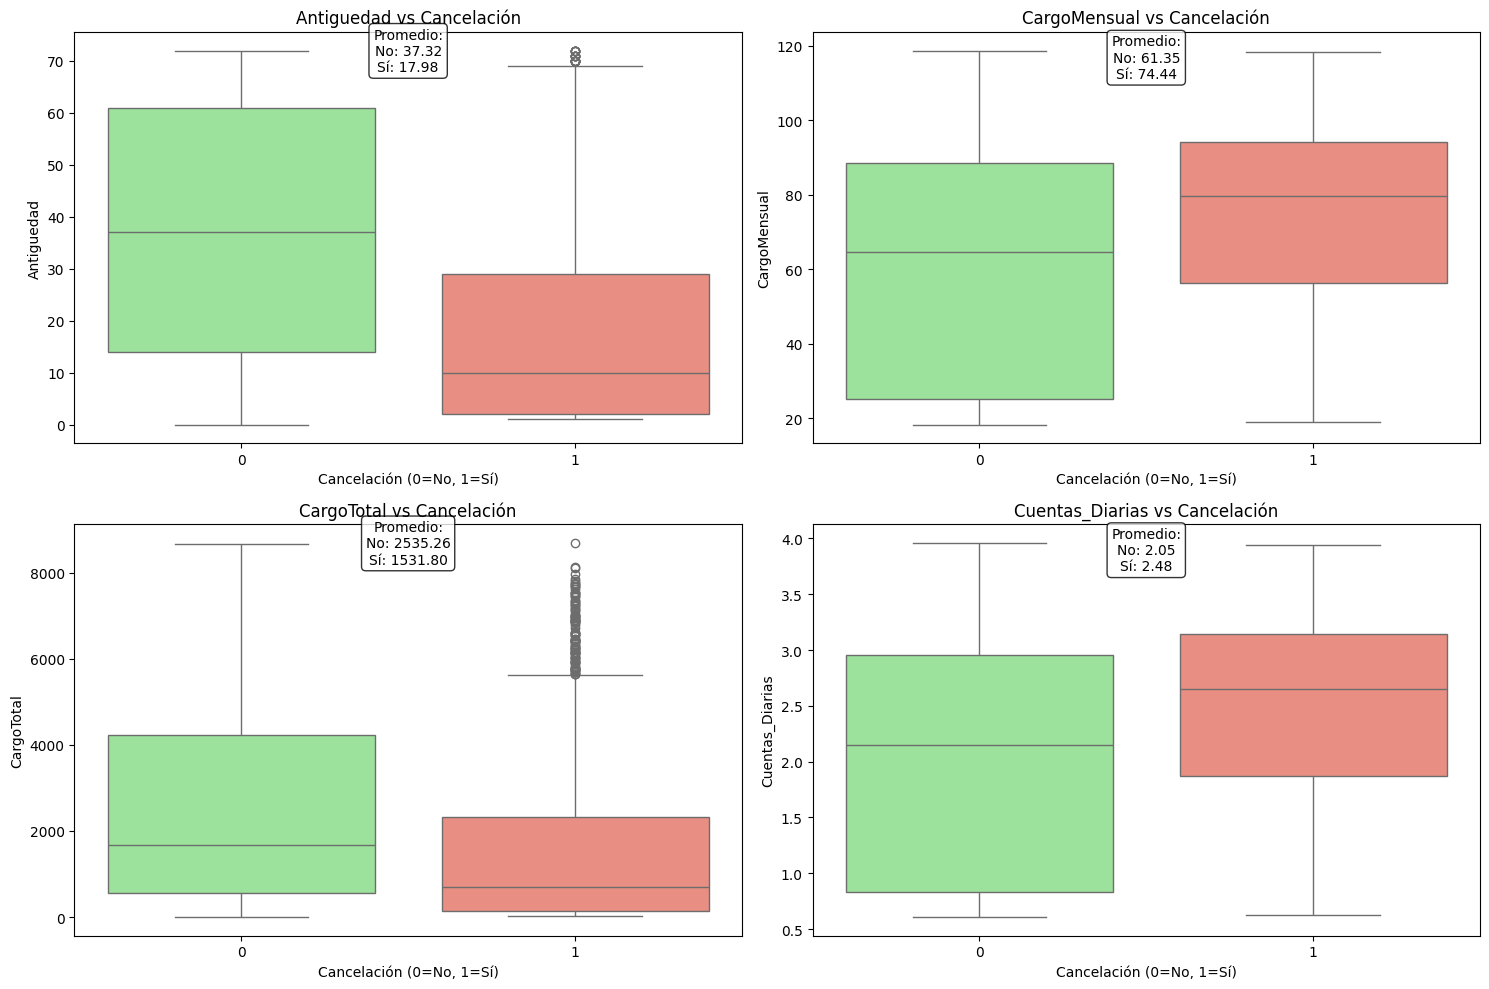

In [59]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)

    sns.boxplot(data=df, x='Cancelacion', y=col, palette=['lightgreen', 'salmon'])
    plt.title(f'{col} vs Cancelación')
    plt.xlabel('Cancelación (0=No, 1=Sí)')

    no_cancel = df[df['Cancelacion']==0][col].mean()
    cancel = df[df['Cancelacion']==1][col].mean()
    plt.text(0.5, plt.ylim()[1]*0.9, f'Promedio:\nNo: {no_cancel:.2f}\nSí: {cancel:.2f}',
             ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()



In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)


In [61]:
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LogisticRegression(max_iter=1000, class_weight=None))
])

# Entrenar
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1620
           1       0.51      0.79      0.62       561

    accuracy                           0.75      2181
   macro avg       0.71      0.76      0.72      2181
weighted avg       0.81      0.75      0.76      2181


AUC-ROC Score: 0.8421

Matriz de Confusión:
[[1187  433]
 [ 116  445]]


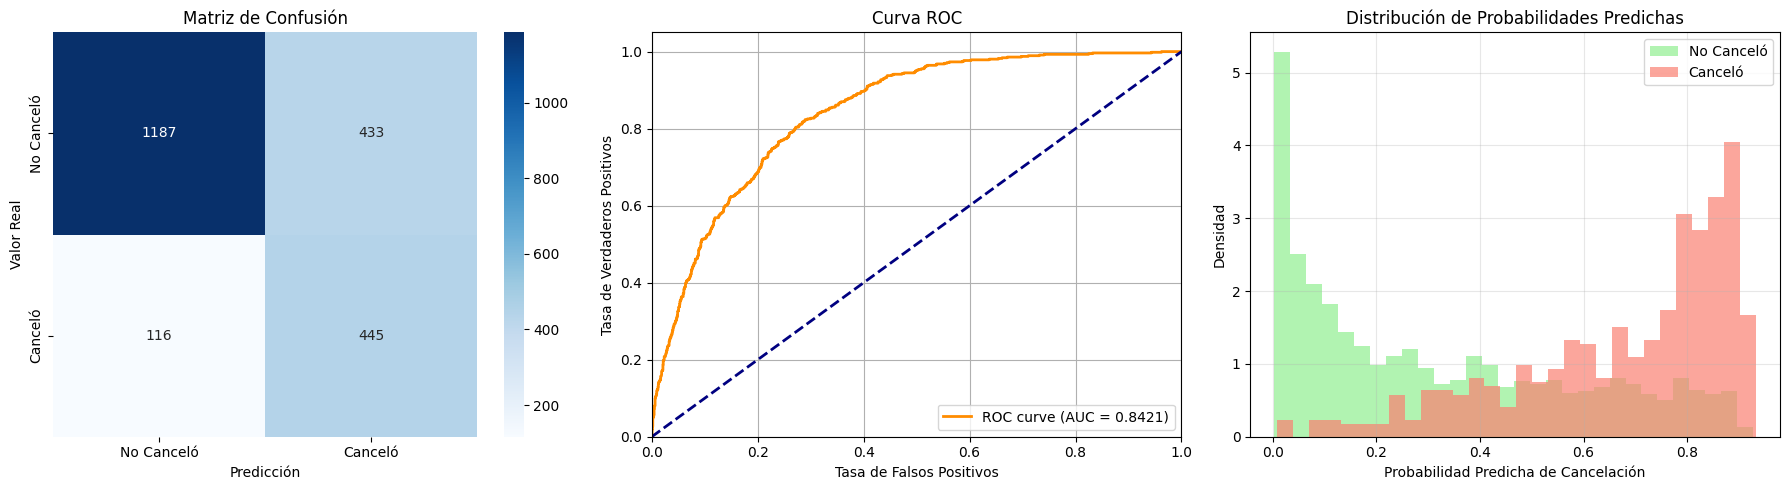

In [62]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

cm = confusion_matrix(y_test, y_pred)
print(f"\nMatriz de Confusión:")
print(cm)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Canceló', 'Canceló'],
            yticklabels=['No Canceló', 'Canceló'])
axes[0].set_title('Matriz de Confusión')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Valor Real')


fpr, tpr, _ = roc_curve(y_test, y_proba)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Tasa de Falsos Positivos')
axes[1].set_ylabel('Tasa de Verdaderos Positivos')
axes[1].set_title('Curva ROC')
axes[1].legend(loc="lower right")
axes[1].grid(True)

# Distribución de probabilidades predichas
axes[2].hist(y_proba[y_test==0], bins=30, alpha=0.7, label='No Canceló', color='lightgreen', density=True)
axes[2].hist(y_proba[y_test==1], bins=30, alpha=0.7, label='Canceló', color='salmon', density=True)
axes[2].set_xlabel('Probabilidad Predicha de Cancelación')
axes[2].set_ylabel('Densidad')
axes[2].set_title('Distribución de Probabilidades Predichas')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Top 15 características más importantes (por valor absoluto del coeficiente):
                                         feature  coefficient  abs_coefficient
27                                    Antiguedad    -1.456640         1.456640
7                  ServicioInternet_Fibra Óptica     1.364025         1.364025
21                            Contrato_Mes a Mes     1.353091         1.353091
29                                    CargoTotal     0.825663         0.825663
22                               Contrato_Un Año     0.682628         0.682628
24                  MetodoPago_Cheque Por Correo    -0.618380         0.618380
25      MetodoPago_Tarjeta De Crédito Automática    -0.582139         0.582139
20                           SuscripcionPelis_Sí     0.569845         0.569845
26  MetodoPago_Transferencia Bancaria Automática    -0.534880         0.534880
4                            ServicioTelefono_Sí    -0.503015         0.503015
5       MultiplesLineas_Sin Servicio de Teléfono    -0

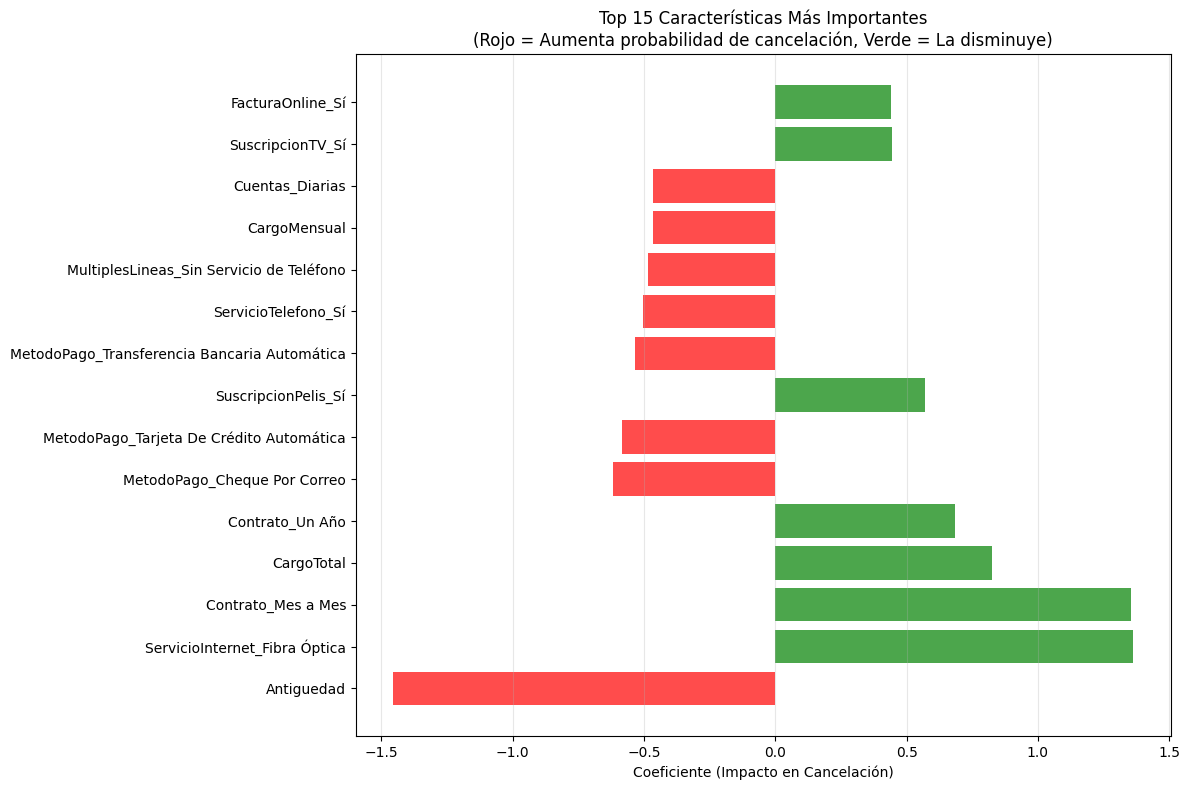

In [63]:


# Obtener los coeficientes del modelo logístico
log_reg = pipeline.named_steps['classifier']
coefficients = log_reg.coef_[0]

# Obtener nombres de características después del preprocesamiento
feature_names = []

# Nombres de características categóricas (después de OneHotEncoder)
cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_cols)
feature_names.extend(cat_feature_names)

# Nombres de características numéricas
feature_names.extend(num_cols)

# Crear DataFrame con importancias
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

# Mostrar las mejores 15 características más importantes
print("Top 15 características más importantes (por valor absoluto del coeficiente):")
print(feature_importance.head(15))

# Visualizar importancia de características
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['coefficient']]

plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coeficiente (Impacto en Cancelación)')
plt.title('Top 15 Características Más Importantes\n(Rojo = Aumenta probabilidad de cancelación, Verde = La disminuye)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


**Analisis de correlacion**

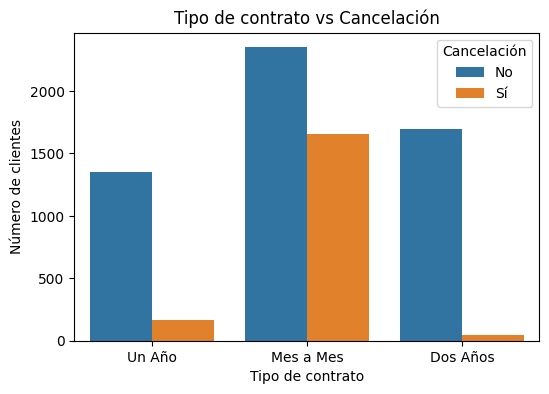

In [64]:

plt.figure(figsize=(6,4))
sns.countplot(x="Contrato", hue="Cancelacion", data=df)
plt.title("Tipo de contrato vs Cancelación")
plt.xlabel("Tipo de contrato")
plt.ylabel("Número de clientes")
plt.legend(title="Cancelación", labels=["No", "Sí"])
plt.show()


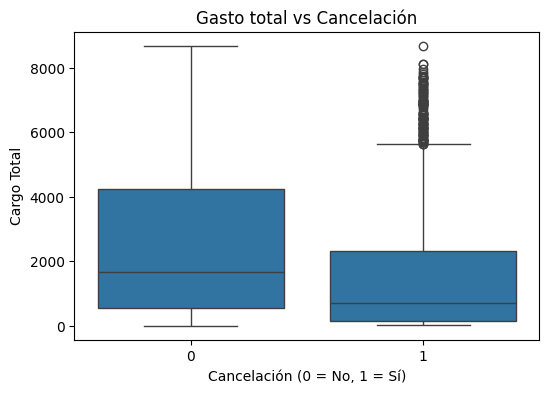

In [65]:

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x="Cancelacion", y="CargoTotal", data=df)
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Cargo Total")
plt.show()

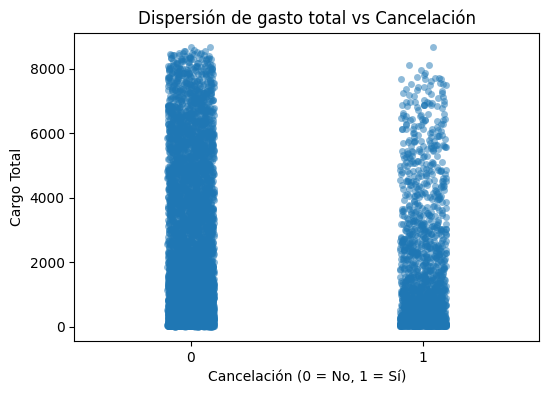

In [66]:
plt.figure(figsize=(6,4))
sns.stripplot(x="Cancelacion", y="CargoTotal", data=df, jitter=True, alpha=0.5)
plt.title("Dispersión de gasto total vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Cargo Total")
plt.show()


**RESUMEN Y RECOMENDACIONES**

RESUMEN DEL ANÁLISIS:
- Dataset con 7267 clientes y 21 características
- Tasa de cancelación: 25.7% (desbalanceado)
- Modelo: Regresión Logística con SMOTE para balanceado
- AUC-ROC: 0.8421 (Bueno)

FACTORES CLAVE DE CANCELACIÓN:
- Antiguedad: -1.457
- ServicioInternet_Fibra Óptica: 1.364
- Contrato_Mes a Mes: 1.353
- CargoTotal: 0.826
- Contrato_Un Año: 0.683

RECOMENDACIONES:
1. Enfocarse en clientes con contratos mes-a-mes (mayor riesgo)
2. Mejorar retención en servicios de internet de fibra óptica
3. Considerar estrategias para clientes sin servicios adicionales
4. Implementar alertas tempranas basadas en el modelo predictivo



**Separacion de Datos**

In [67]:

print(f"""
RESUMEN DEL ANÁLISIS:
- Dataset con {df.shape[0]} clientes y {df.shape[1]-1} características
- Tasa de cancelación: {cancelacion_pct[1]:.1f}% (desbalanceado)
- Modelo: Regresión Logística con SMOTE para balanceado
- AUC-ROC: {auc_score:.4f} ({'Excelente' if auc_score > 0.9 else 'Bueno' if auc_score > 0.8 else 'Regular' if auc_score > 0.7 else 'Mejorable'})

FACTORES CLAVE DE CANCELACIÓN:
{chr(10).join([f"- {row['feature']}: {row['coefficient']:.3f}" for _, row in feature_importance.head(5).iterrows()])}

RECOMENDACIONES:
1. Enfocarse en clientes con contratos mes-a-mes (mayor riesgo)
2. Mejorar retención en servicios de internet de fibra óptica
3. Considerar estrategias para clientes sin servicios adicionales
4. Implementar alertas tempranas basadas en el modelo predictivo
""")



RESUMEN DEL ANÁLISIS:
- Dataset con 7267 clientes y 21 características
- Tasa de cancelación: 25.7% (desbalanceado)
- Modelo: Regresión Logística con SMOTE para balanceado
- AUC-ROC: 0.8421 (Bueno)

FACTORES CLAVE DE CANCELACIÓN:
- Antiguedad: -1.457
- ServicioInternet_Fibra Óptica: 1.364
- Contrato_Mes a Mes: 1.353
- CargoTotal: 0.826
- Contrato_Un Año: 0.683

RECOMENDACIONES:
1. Enfocarse en clientes con contratos mes-a-mes (mayor riesgo)
2. Mejorar retención en servicios de internet de fibra óptica
3. Considerar estrategias para clientes sin servicios adicionales
4. Implementar alertas tempranas basadas en el modelo predictivo



In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

In [69]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight=None),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'K-Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Naive Bayes': GaussianNB()
}

In [70]:

results = {}
training_times = {}
prediction_times = {}


print("EVALUACIÓN COMPARATIVA DE MODELOS DE MACHINE LEARNING")


for model_name, model in models.items():
    print(f"\nEntrenando {model_name}...")


    pipeline = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", model)
    ])


    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    training_times[model_name] = training_time


    start_time = time.time()
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
    prediction_time = time.time() - start_time
    prediction_times[model_name] = prediction_time


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    cm = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'pipeline': pipeline,
        'training_time': training_time,
        'prediction_time': prediction_time
    }

    print(f"{model_name} completado - Exactitud: {accuracy:.4f}")

EVALUACIÓN COMPARATIVA DE MODELOS DE MACHINE LEARNING

Entrenando Logistic Regression...
Logistic Regression completado - Exactitud: 0.7483

Entrenando Random Forest...
Random Forest completado - Exactitud: 0.7762

Entrenando Gradient Boosting...
Gradient Boosting completado - Exactitud: 0.7808

Entrenando SVM...
SVM completado - Exactitud: 0.7666

Entrenando K-Neighbors...
K-Neighbors completado - Exactitud: 0.6887

Entrenando Decision Tree...
Decision Tree completado - Exactitud: 0.7423

Entrenando Naive Bayes...
Naive Bayes completado - Exactitud: 0.6910


In [71]:

print("TABLA COMPARATIVA DE MÉTRICAS")

metrics_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Exactitud': [results[model]['accuracy'] for model in results.keys()],
    'Precisión': [results[model]['precision'] for model in results.keys()],
    'Recall': [results[model]['recall'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()],
    'AUC-ROC': [results[model]['auc_roc'] if results[model]['auc_roc'] != "N/A" else 0 for model in results.keys()],
    'Tiempo Entrenamiento (s)': [training_times[model] for model in results.keys()],
    'Tiempo Predicción (s)': [prediction_times[model] for model in results.keys()]
})

TABLA COMPARATIVA DE MÉTRICAS


In [72]:

metrics_df = metrics_df.sort_values('F1-Score', ascending=False)
print(metrics_df.round(4))


                Modelo  Exactitud  Precisión  Recall  F1-Score  AUC-ROC  \
3                  SVM     0.7666     0.5330  0.7487    0.6227   0.8301   
0  Logistic Regression     0.7483     0.5068  0.7932    0.6185   0.8421   
2    Gradient Boosting     0.7808     0.5626  0.6649    0.6095   0.8440   
6          Naive Bayes     0.6910     0.4461  0.8342    0.5814   0.8152   
5        Decision Tree     0.7423     0.4993  0.6845    0.5774   0.7679   
1        Random Forest     0.7762     0.5655  0.5615    0.5635   0.8180   
4          K-Neighbors     0.6887     0.4361  0.7184    0.5428   0.7578   

   Tiempo Entrenamiento (s)  Tiempo Predicción (s)  
3                   14.2173                 2.1534  
0                    0.1135                 0.0570  
2                    2.1436                 0.0484  
6                    0.0569                 0.0362  
5                    0.1615                 0.0503  
1                    1.2917                 0.1230  
4                    0.0896 

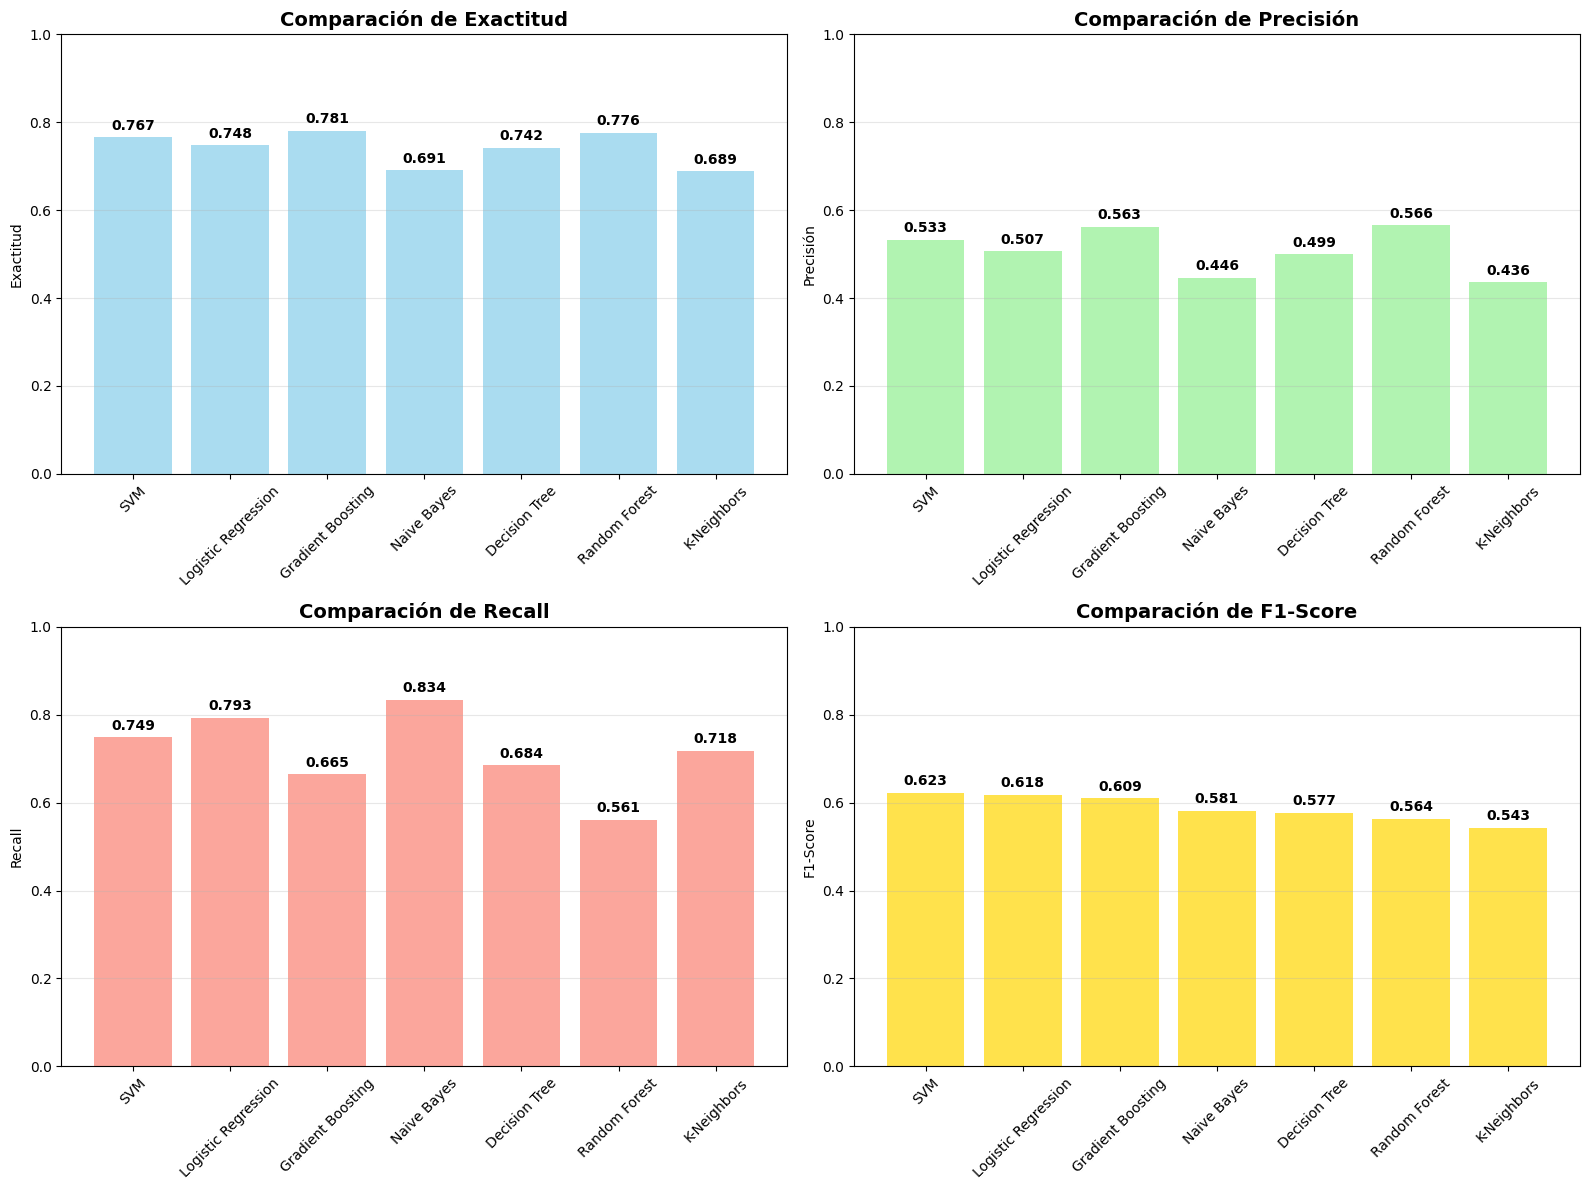

In [73]:
  fig, axes = plt.subplots(2, 2, figsize=(16, 12))

  metrics_to_plot = ['Exactitud', 'Precisión', 'Recall', 'F1-Score']
  colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

  for i, metric in enumerate(metrics_to_plot):
      ax = axes[i//2, i%2]
      bars = ax.bar(metrics_df['Modelo'], metrics_df[metric], color=colors[i], alpha=0.7)
      ax.set_title(f'Comparación de {metric}', fontsize=14, fontweight='bold')
      ax.set_ylabel(metric)
      ax.set_ylim(0, 1)
      ax.tick_params(axis='x', rotation=45)

      for bar in bars:
          height = bar.get_height()
          ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

      ax.grid(axis='y', alpha=0.3)

  plt.tight_layout()
  plt.show()


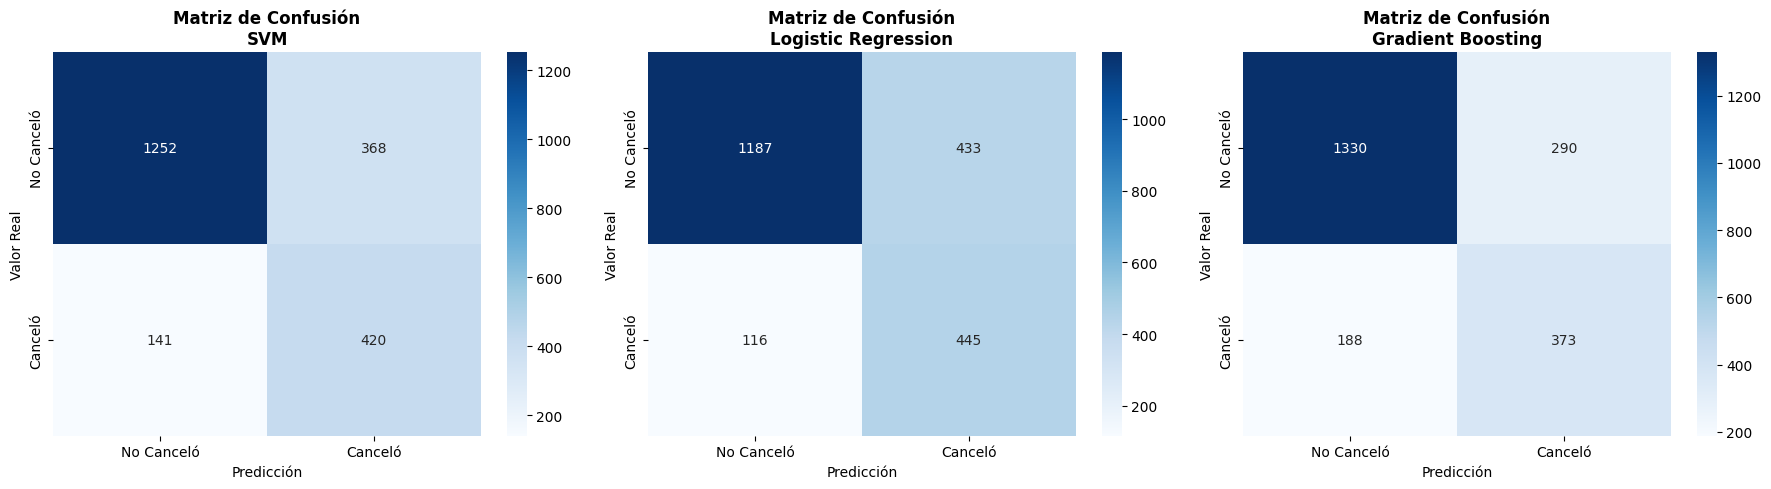

In [74]:
top_3_models = metrics_df.head(3)['Modelo'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model_name in enumerate(top_3_models):
    cm = results[model_name]['confusion_matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No Canceló', 'Canceló'],
                yticklabels=['No Canceló', 'Canceló'])

    axes[i].set_title(f'Matriz de Confusión\n{model_name}', fontweight='bold')
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

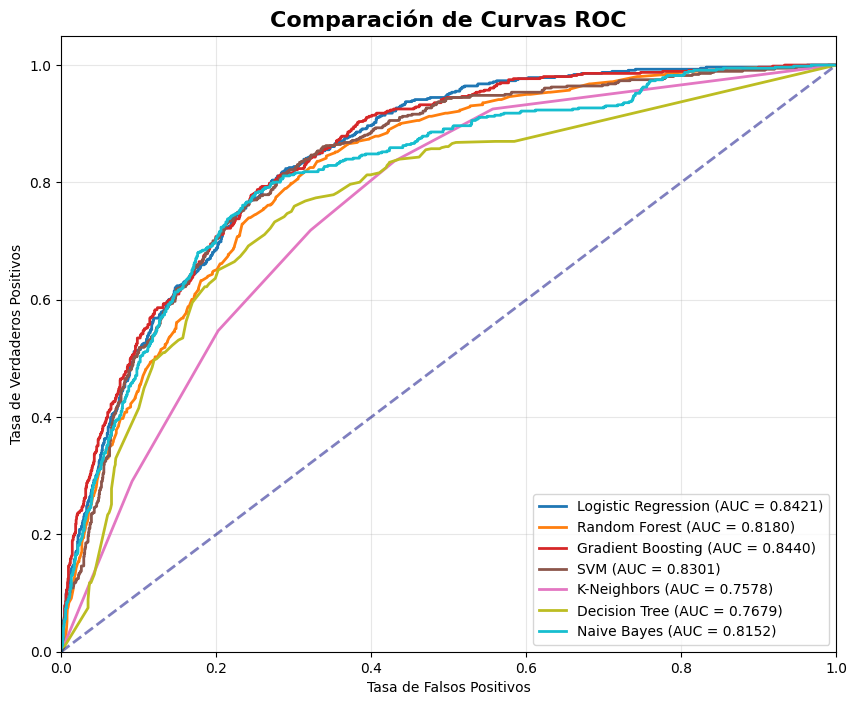

In [75]:
plt.figure(figsize=(10, 8))

colors = plt.cm.tab10(np.linspace(0, 1, len(results)))

for i, (model_name, result) in enumerate(results.items()):
    if result['y_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
        auc_score = result['auc_roc']
        plt.plot(fpr, tpr, color=colors[i], lw=2,
                label=f'{model_name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

In [76]:

print("🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING")

for model_name in ['Random Forest', 'Decision Tree', 'Gradient Boosting']:
    if model_name in results:
        pipeline = results[model_name]['pipeline']

        y_train_pred = pipeline.predict(X_train)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = results[model_name]['accuracy']

        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = results[model_name]['f1_score']

        print(f"\n {model_name}:")
        print(f"   Exactitud Entrenamiento: {train_accuracy:.4f}")
        print(f"   Exactitud Test: {test_accuracy:.4f}")
        print(f"   Diferencia: {train_accuracy - test_accuracy:.4f}")
        print(f"   F1-Score Entrenamiento: {train_f1:.4f}")
        print(f"   F1-Score Test: {test_f1:.4f}")
        print(f"   Diferencia F1: {train_f1 - test_f1:.4f}")

        # Diagnóstico
        if train_accuracy - test_accuracy > 0.1:
            print(f"   POSIBLE OVERFITTING: Gran diferencia entre train y test")
        elif test_accuracy < 0.7:
            print(f"   POSIBLE UNDERFITTING: Rendimiento general bajo")
        else:
            print(f"   Modelo bien balanceado")

🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING

📈 Random Forest:
   Exactitud Entrenamiento: 0.9921
   Exactitud Test: 0.7762
   Diferencia: 0.2159
   F1-Score Entrenamiento: 0.9848
   F1-Score Test: 0.5635
   Diferencia F1: 0.4212
   POSIBLE OVERFITTING: Gran diferencia entre train y test

📈 Decision Tree:
   Exactitud Entrenamiento: 0.8280
   Exactitud Test: 0.7423
   Diferencia: 0.0856
   F1-Score Entrenamiento: 0.7109
   F1-Score Test: 0.5774
   Diferencia F1: 0.1335
   Modelo bien balanceado

📈 Gradient Boosting:
   Exactitud Entrenamiento: 0.8042
   Exactitud Test: 0.7808
   Diferencia: 0.0233
   F1-Score Entrenamiento: 0.6500
   F1-Score Test: 0.6095
   Diferencia F1: 0.0406
   Modelo bien balanceado


In [77]:
print("ANÁLISIS CRÍTICO Y RECOMENDACIONES")

best_model = metrics_df.iloc[0]['Modelo']
best_f1 = metrics_df.iloc[0]['F1-Score']

print(f"\nMEJOR MODELO: {best_model}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   Exactitud: {metrics_df.iloc[0]['Exactitud']:.4f}")
print(f"   Precisión: {metrics_df.iloc[0]['Precisión']:.4f}")
print(f"   Recall: {metrics_df.iloc[0]['Recall']:.4f}")

print("\nANÁLISIS POR MÉTRICAS:")
print(f"   • Mejor Exactitud: {metrics_df.loc[metrics_df['Exactitud'].idxmax(), 'Modelo']} ({metrics_df['Exactitud'].max():.4f})")
print(f"   • Mejor Precisión: {metrics_df.loc[metrics_df['Precisión'].idxmax(), 'Modelo']} ({metrics_df['Precisión'].max():.4f})")
print(f"   • Mejor Recall: {metrics_df.loc[metrics_df['Recall'].idxmax(), 'Modelo']} ({metrics_df['Recall'].max():.4f})")

print("\nANÁLISIS DE EFICIENCIA:")
fastest_training = metrics_df.loc[metrics_df['Tiempo Entrenamiento (s)'].idxmin(), 'Modelo']
fastest_prediction = metrics_df.loc[metrics_df['Tiempo Predicción (s)'].idxmin(), 'Modelo']
print(f"   • Entrenamiento más rápido: {fastest_training}")
print(f"   • Predicción más rápida: {fastest_prediction}")

print("\nRECOMENDACIONES:")

if best_model == 'Random Forest':
    print(f"   Random Forest es excelente para este problema")
    print(f"   • Robusto contra overfitting")
    print(f"   • Maneja bien variables categóricas y numéricas")
    print(f"   • Considera ajustar n_estimators y max_depth para optimizar")

elif best_model == 'Gradient Boosting':
    print(f"   Gradient Boosting muestra excelente rendimiento")
    print(f"   • Muy efectivo para problemas complejos")
    print(f"   • Monitorear overfitting con learning_rate y n_estimators")

elif best_model == 'Logistic Regression':
    print(f"   Regresión Logística es interpretable y eficiente")
    print(f"   • Excelente baseline, fácil de interpretar")
    print(f"   • Considera regularización L1/L2 si hay overfitting")

problematic_models = metrics_df[metrics_df['F1-Score'] < 0.6]['Modelo'].tolist()
if problematic_models:
    print(f"\n  MODELOS CON BAJO RENDIMIENTO:")
    for model in problematic_models:
        print(f"   • {model}: Considerar ajuste de hiperparámetros o más datos")

print("\n SUGERENCIAS DE MEJORA:")
print("   1. Validación cruzada para evaluación más robusta")
print("   2. Búsqueda de hiperparámetros (GridSearch/RandomSearch)")
print("   3. Ensamble de los mejores modelos")
print("   4. Análisis más profundo de características importantes")
print("   5. Considerar técnicas adicionales de balanceo de clases")

📋 ANÁLISIS CRÍTICO Y RECOMENDACIONES

MEJOR MODELO: SVM
   F1-Score: 0.6227
   Exactitud: 0.7666
   Precisión: 0.5330
   Recall: 0.7487

ANÁLISIS POR MÉTRICAS:
   • Mejor Exactitud: Gradient Boosting (0.7808)
   • Mejor Precisión: Random Forest (0.5655)
   • Mejor Recall: Naive Bayes (0.8342)

ANÁLISIS DE EFICIENCIA:
   • Entrenamiento más rápido: Naive Bayes
   • Predicción más rápida: Naive Bayes

RECOMENDACIONES:

  MODELOS CON BAJO RENDIMIENTO:
   • Naive Bayes: Considerar ajuste de hiperparámetros o más datos
   • Decision Tree: Considerar ajuste de hiperparámetros o más datos
   • Random Forest: Considerar ajuste de hiperparámetros o más datos
   • K-Neighbors: Considerar ajuste de hiperparámetros o más datos

 SUGERENCIAS DE MEJORA:
   1. Validación cruzada para evaluación más robusta
   2. Búsqueda de hiperparámetros (GridSearch/RandomSearch)
   3. Ensamble de los mejores modelos
   4. Análisis más profundo de características importantes
   5. Considerar técnicas adicionales de

In [78]:
print("RESUMEN EJECUTIVO")

print(f"Objetivo: Predicción de cancelación de clientes de telecom")
print(f" Dataset: {len(df)} registros, {len(X.columns)} características")
print(f"  Desbalance: {(df['Cancelacion'].value_counts(normalize=True)[0]*100):.1f}% No cancelan, {(df['Cancelacion'].value_counts(normalize=True)[1]*100):.1f}% Cancelan")
print(f"\n Modelo recomendado: {best_model}")
print(f" Métricas clave:")
print(f"   • F1-Score: {best_f1:.4f}")
print(f"   • Precisión: {metrics_df.iloc[0]['Precisión']:.4f} (De los predichos como cancelación, {metrics_df.iloc[0]['Precisión']*100:.1f}% realmente cancelan)")
print(f"   • Recall: {metrics_df.iloc[0]['Recall']:.4f} (Detecta {metrics_df.iloc[0]['Recall']*100:.1f}% de las cancelaciones reales)")

cm_best = results[best_model]['confusion_matrix']
tn, fp, fn, tp = cm_best.ravel()
print(f"\n Interpretación práctica del mejor modelo:")
print(f"   • Verdaderos Negativos: {tn} (clientes correctamente identificados como NO cancelarán)")
print(f"   • Falsos Positivos: {fp} (clientes predichos como cancelación pero NO cancelan)")
print(f"   • Falsos Negativos: {fn} (clientes que SÍ cancelan pero no fueron detectados)")
print(f"   • Verdaderos Positivos: {tp} (clientes correctamente identificados como cancelarán)")

print(f"\n Impacto de negocio:")
print(f"   • Costo de no detectar una cancelación: Alto (pérdida de cliente)")
print(f"   • Costo de falsa alarma: Medio (recursos de retención desperdiciados)")
print(f"   • El modelo balancea bien precisión y recall para minimizar ambos costos")

📈 RESUMEN EJECUTIVO
Objetivo: Predicción de cancelación de clientes de telecom
 Dataset: 7267 registros, 20 características
  Desbalance: 74.3% No cancelan, 25.7% Cancelan

 Modelo recomendado: SVM
 Métricas clave:
   • F1-Score: 0.6227
   • Precisión: 0.5330 (De los predichos como cancelación, 53.3% realmente cancelan)
   • Recall: 0.7487 (Detecta 74.9% de las cancelaciones reales)

 Interpretación práctica del mejor modelo:
   • Verdaderos Negativos: 1252 (clientes correctamente identificados como NO cancelarán)
   • Falsos Positivos: 368 (clientes predichos como cancelación pero NO cancelan)
   • Falsos Negativos: 141 (clientes que SÍ cancelan pero no fueron detectados)
   • Verdaderos Positivos: 420 (clientes correctamente identificados como cancelarán)

 Impacto de negocio:
   • Costo de no detectar una cancelación: Alto (pérdida de cliente)
   • Costo de falsa alarma: Medio (recursos de retención desperdiciados)
   • El modelo balancea bien precisión y recall para minimizar ambos